In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 9)})
sns.set_style('ticks')

pd.options.display.max_rows = 400

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(os.path.join('files', 'for-plots.csv'))
df = df[df['icpsr'].notnull()]

df['minutes'] = [str(x).replace(',','') for x in df['minutes']]
df['minutes'] = df['minutes'].astype('float')

In [3]:
df['seat'] = np.where((df['seat'].isnull())&(df['chamber']=='Senate'), 'federal:senate', df['seat'])
df['seat'] = np.where((df['seat'].isnull())&(df['chamber']=='House'), 'federal:house', df['seat'])
df['seat'] = np.where((df['seat'].isnull())&(df['chamber']=='President'), 'federal:president', df['seat'])

In [4]:
df.sort_values('minutes', ascending=False, inplace=True)

In [5]:
df['sctv_name'] = df['sctv_name'].str.title()

### Top 50

Text(0, 0.5, '')

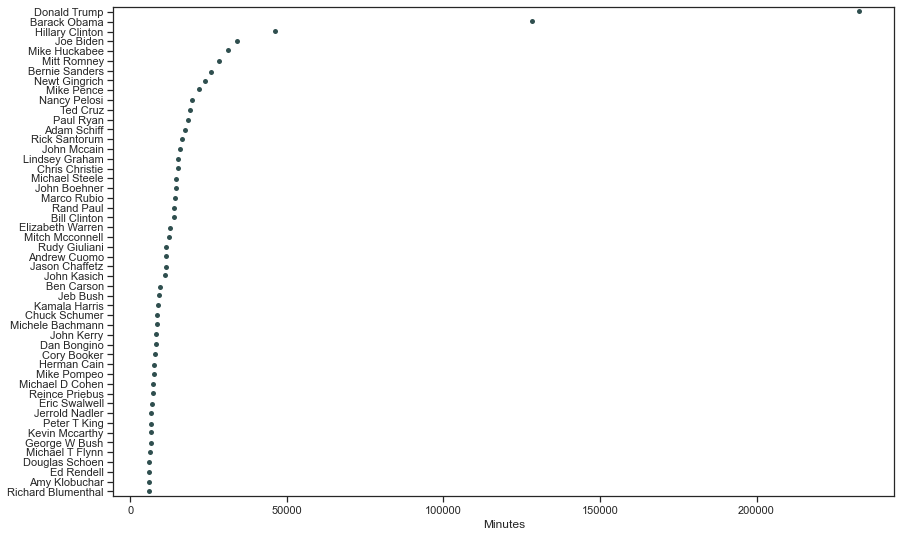

In [6]:
sns.stripplot(x='minutes', y='sctv_name', data=df.head(50), 
              orient='h', color='darkslategray')

plt.xlabel('Minutes')
plt.ylabel('')

### Aggregated by Seat

In [7]:
agg = df.groupby(['seat'])['minutes'].sum().reset_index()
agg.sort_values('minutes', ascending=False, inplace=True)

Text(0, 0.5, '')

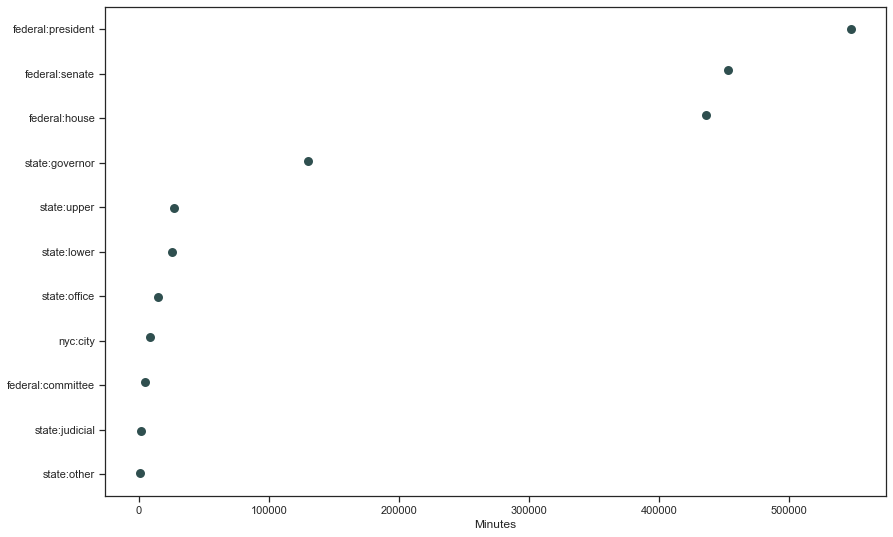

In [12]:
sns.stripplot(x='minutes', y='seat', data=agg, 
              orient='h', color='darkslategray', size=9)

plt.xlabel('Minutes')
plt.ylabel('')

### Top 50 (with type, without Trump and Obama)

In [9]:
# Both have more than twice the coverage minutes of the 3rd ranked politician
df = df[(df['sctv_name']!='Barack Obama')&(df['sctv_name']!='Donald Trump')]

In [10]:
df['type'] = np.where(df['seat']=='federal:senate', 'Senator', 'Others')
df['type'] = np.where(df['seat']=='federal:house', 'House Rep.', df['type'])
df['type'] = np.where(df['seat']=='federal:president', 'President', df['type'])

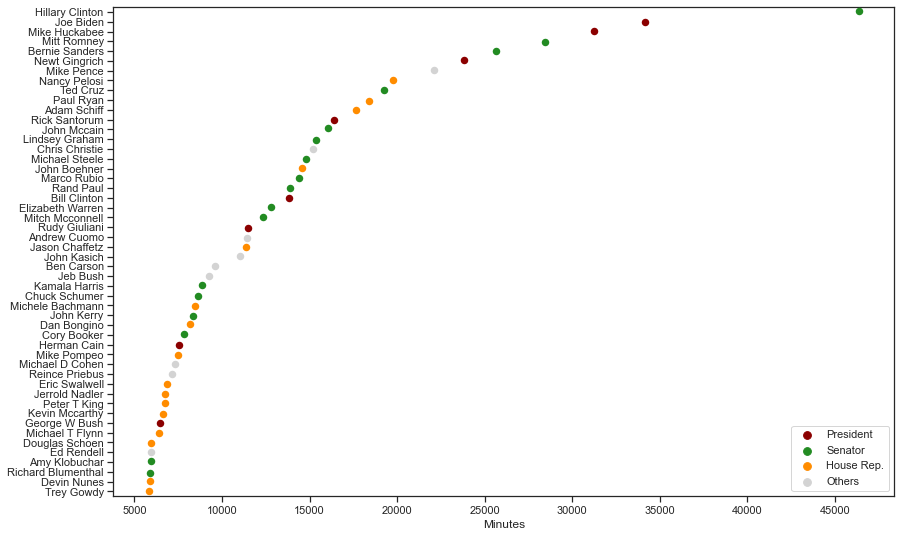

In [11]:
PALETTE = ['forestgreen', 'darkred', 'lightgrey', 'darkorange']

g = sns.stripplot(x='minutes', y='sctv_name', data=df.head(50), 
                  hue='type', orient='h', palette=PALETTE, size=7.5)

plt.xlabel('Minutes')
plt.ylabel('')

handles, labels = g.get_legend_handles_labels()
labels = [labels[1], labels[0], labels[3], labels[2]]
handles = [handles[1], handles[0], handles[3], handles[2]]

plt.legend(handles, labels, loc='lower right')